In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn import decomposition
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

/Users/khandekara2/anaconda3/lib/python3.6/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory: 'sysctl'
  stacklevel=stacklevel + 1):
/Users/khandekara2/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/khandekara2/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#read in  unnormalized data
import pandas as pd
df = pd.read_csv('team_attributes_processed-2009-2010-raw_data.csv')
df2 = pd.read_csv('team_attributes_processed-2010-2011-raw_data.csv')
df3 = pd.read_csv('team_attributes_processed-2011-2012-raw_data.csv')
df4 = pd.read_csv('team_attributes_processed-2013-2014-raw_data.csv')
df5 = pd.read_csv('team_attributes_processed-2014-2015-raw_data.csv')

In [3]:
#concatenate separate seasons
frames = [df, df2, df3, df4, df5]
result = pd.concat(frames)
result.shape

(100, 28)

In [9]:
X = result.iloc[:, 3:-1]
y = result['Score']

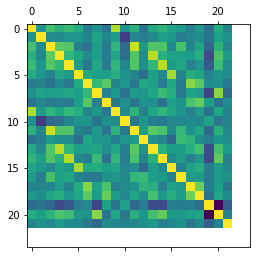

In [36]:
plt.matshow(X.corr())

In [10]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [14]:
print (X_train.shape)

(70, 24)


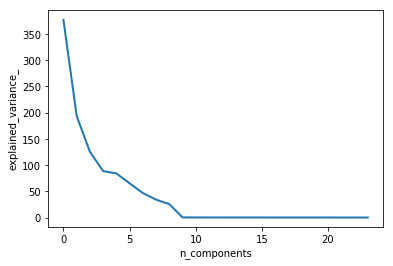

In [11]:
#scree plot for PCA n_components
%matplotlib inline
pca = decomposition.PCA()
pca.fit(X_train)


fig, ax = plt.subplots(1,1)
ax.plot(pca.explained_variance_, linewidth=2)
ax.set_xlabel('n_components')
ax.set_ylabel('explained_variance_')

In [26]:
#apply grid search to search for best pca n_components followed by random forest regression
from sklearn.pipeline import Pipeline
regressor = RandomForestRegressor(random_state = 3, max_features=3)
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('regressor', regressor)])
n_components = [i for i in range(3, 25)]
n_estimators = [250, 500, 750, 1000]
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              regressor__n_estimators=n_estimators))
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurit...estimators=10, n_jobs=1,
           oob_score=False, random_state=3, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'regressor__n_estimators': [250, 500, 750, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [27]:
print('The best model parameters are:', estimator.best_params_)

The best model parameters are: {'pca__n_components': 16, 'regressor__n_estimators': 250}


In [28]:
y_true, y_pred = y_test, estimator.predict(X_test)

In [29]:
#compute error metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
print ('Mean Absolute Error: %d' %(mae))
print ('Mean Squared Error: %d' %(mse))

Mean Absolute Error: 12
Mean Squared Error: 225


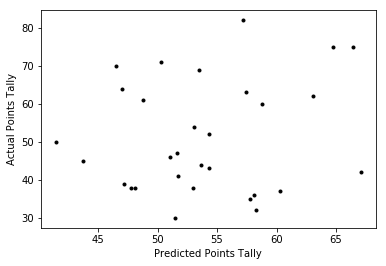

In [30]:
%matplotlib inline
plt.plot(y_pred, y_true, 'k.')
plt.xlabel("Predicted Points Tally")
plt.ylabel("Actual Points Tally")

In [37]:
#load new, never seen before dataset
df6 = pd.read_csv('team_attributes_processed-2015-2016-raw_data.csv')
X_new = df6.iloc[:, 3:-1]
y_new = df6['Score']

In [38]:
estimator.fit(X, y)
y_true, y_pred = y_new, estimator.predict(X_new)

In [39]:
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
print ('Mean Absolute Error: %d' %(mae))
print ('Mean Squared Error: %d' %(mse))

Mean Absolute Error: 11
Mean Squared Error: 182


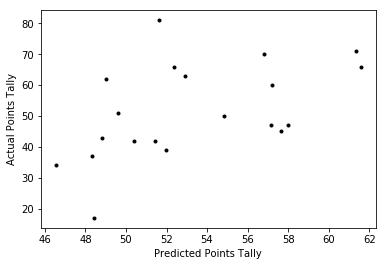

In [40]:
%matplotlib inline
plt.plot(y_pred, y_true, 'k.')
plt.xlabel("Predicted Points Tally")
plt.ylabel("Actual Points Tally")